# Seaborn
- matplotlib을 기반으로 다양한 테마와 그래프를 제공하는 파이썬 시각화 패키지.-
- http://seaborn.pydata.org/
    - 공식 사이트의 [gallary](http://seaborn.pydata.org/examples/index.html)에 제공하는 다양한 그래프와 예제를 확인 할 수 있다.
- 설치: 아나콘다에는 포함되있다.
```
pip install seaborn
conda install seaborn
```
    

In [1]:
# !pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 8.6 MB/s eta 0:00:00


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 경고 안뜨게
import warnings
warnings.filterwarnings(action='ignore')

tips = pd.read_csv('data/tips.csv')
tips.shape

(244, 7)

## rugplot, kdeplot, displot
- 1차원 연속형 값들의 분포를 시각화 하는 그래프

### rugplot 
- 각 데이터들의 위치를 보여준다.

Text(0.5, 1.0, 'Total bill의 rugplot')

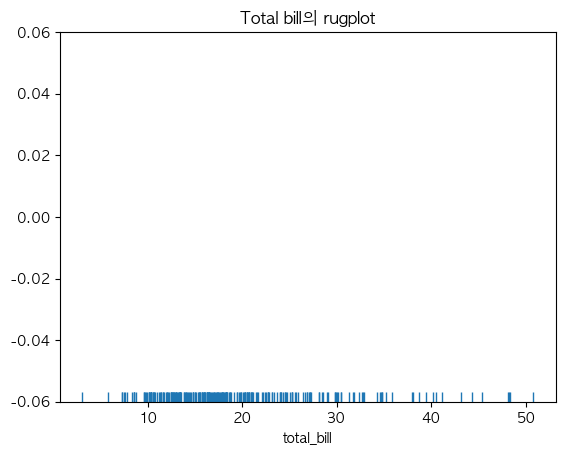

In [15]:
sns.rugplot(x='total_bill', data=tips)  
# data=DataFrame, 값(x)='컬럼명'
plt.title('Total bill의 rugplot')

### kdeplot
- 히스토그램을 부드러운 곡선 형태로 표현한다. 
- KDE(Kernel Density Estimation) : 확률밀도추정

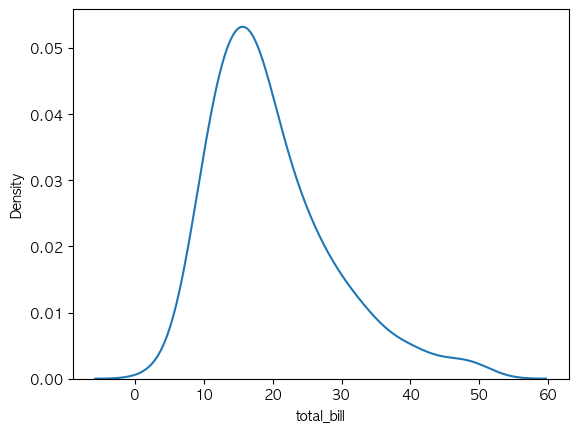

In [16]:
sns.kdeplot(data=tips, x='total_bill')

plt.show()

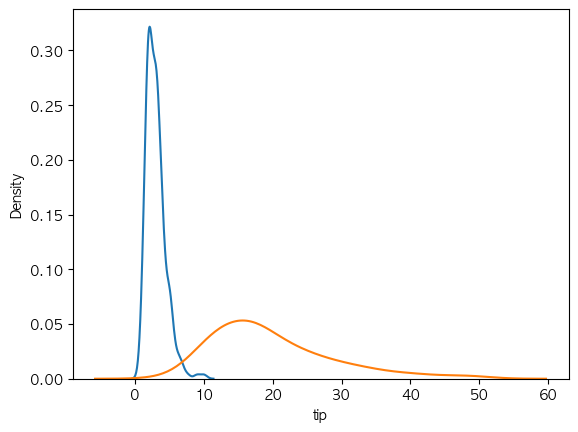

In [17]:
sns.kdeplot(data=tips, x='tip')
sns.kdeplot(data=tips, x='total_bill')
plt.show()

## displot()
- 히스토그램을 기준으로 rugplot, kdeplot을 같이 그릴 수 있다.

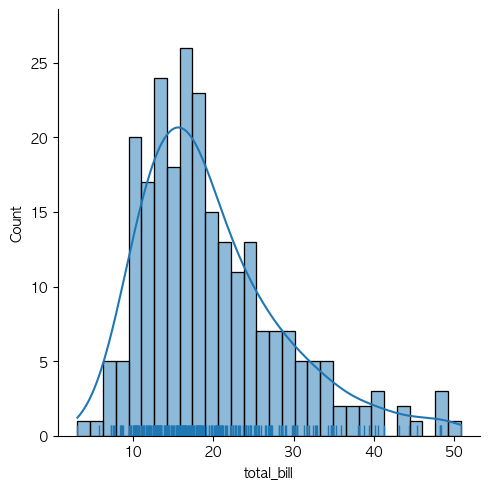

In [19]:
sns.displot(data=tips, x='total_bill', bins=30,
            rug=True,
            kde=True)
plt.show()

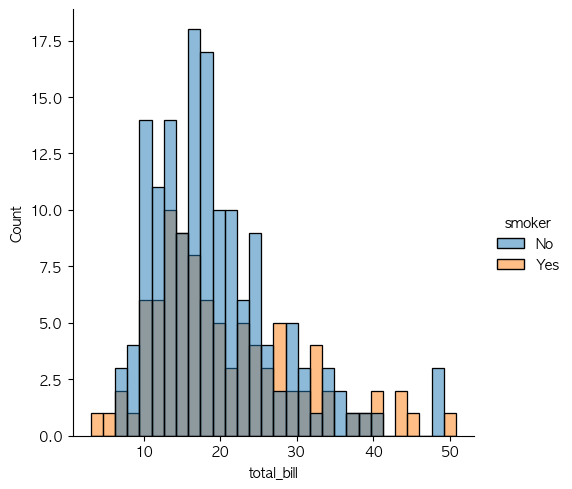

In [24]:
# tips.groupby('smoker')['total_bill']
sns.displot(x='total_bill', hue='smoker', bins=30, data=tips)
# tips 데이터프레임의 total_bill 컬럼의 히스토그램을 smoker 컬럼의 값별로 다른색으로 그려라

## boxplot(), violinplot(), swamplot()
- 연속형 데이터(양적데이터)들의 분포를 확인하는 그래프를 그린다.
- 범주별로 연속형 데이터의 분포를 비교할 수 있다.

### boxplot

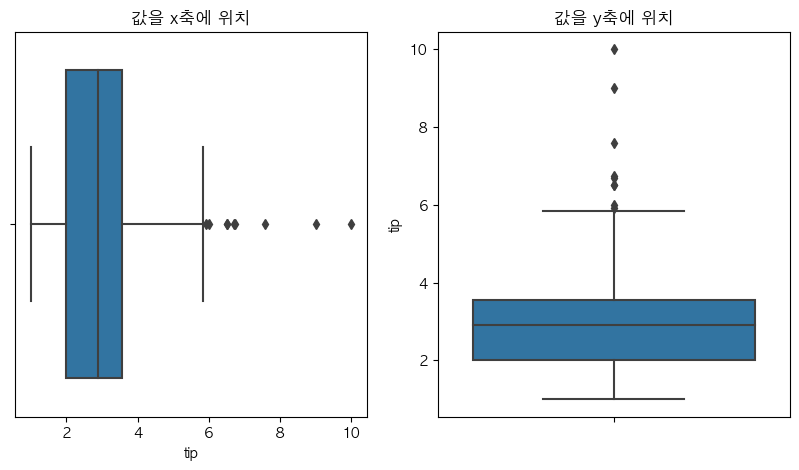

In [2]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=tips, x='tip')
plt.title('값을 x축에 위치')

plt.subplot(1, 2, 2)
sns.boxplot(data=tips, y='tip')
plt.title('값을 y축에 위치')

plt.show()

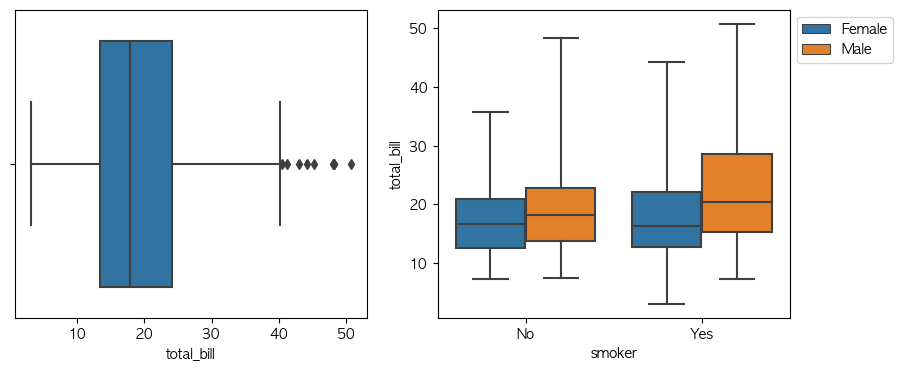

In [10]:
fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(1, 2, 1)
sns.boxplot(data=tips, x='total_bill', ax=ax1)
# ax=ax1: 그래프를 그릴 axes(subplot) 객체를 지정

ax2 = fig.add_subplot(1, 2, 2)
sns.boxplot(data=tips, 
            y='total_bill', # 그래프를 그릴 연속형 컬럼을 y축으로 지정
            x='smoker',     # 나눠서 그릴 범주형컬럼을 x축으로 지정
            hue='sex',      # 1차로 smoker로 나누고 2차로 sex 나눠서 각각 boxplot을 그림
            whis=3,         # 정상범위 밖의 값을 계산할 때 사용하는 whis값 설정 (default 1.5)
            ax=ax2)

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

### violin plot
- boxplot 위에 분포 밀도(kernel density)를 좌우 대칭으로 덮어쓰는 방식으로 데이터의 분포를 표현하므로 boxplot 보다 좀더 정확한 데이터의 분포를 볼 수 있다.
- 매개변수는 boxplot과 동일

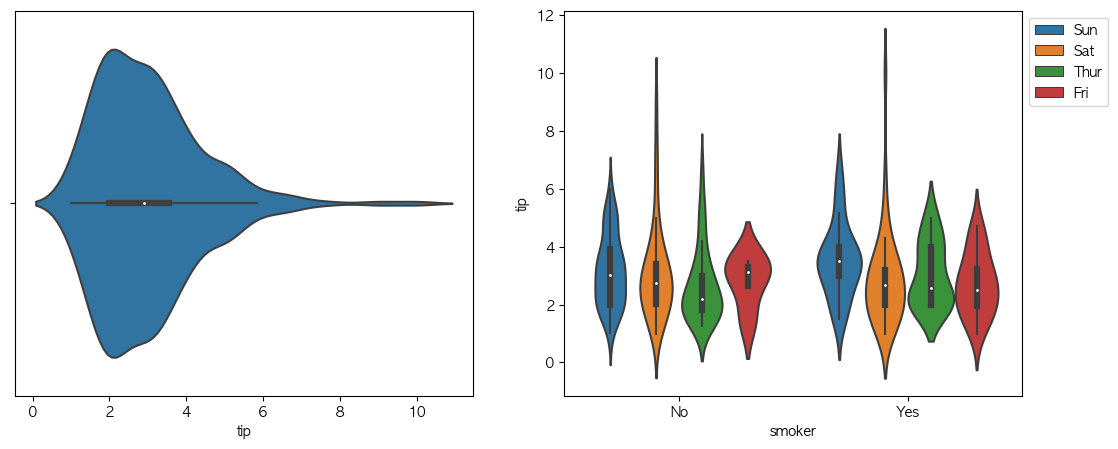

In [13]:
plt.figure(figsize=(13, 5))
plt.subplot(121)
sns.violinplot(data=tips, x='tip')

plt.subplot(1, 2, 2)
sns.violinplot(data=tips, y='tip', x='smoker', hue='day')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

### swarmplot
- 실제 값들을 점으로 찍어 준다. 
- boxplot이나 violin plot의 보안해주는 역할로 쓰인다.
- swarmplot은 가운데 분류를 기준으로 분포시키는데 실제 값이 있는 위치에 점을 찍으므로 좀더 정확하게 값이 어디에 있는지 알 수 있다.

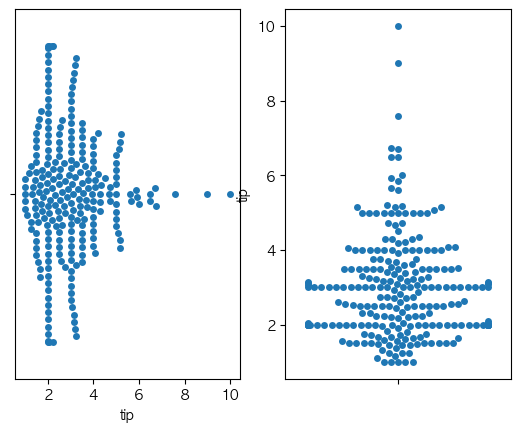

In [14]:
plt.subplot(1, 2, 1)
sns.swarmplot(data=tips, x='tip')

plt.subplot(1, 2, 2)
sns.swarmplot(data=tips, y='tip')

plt.show()

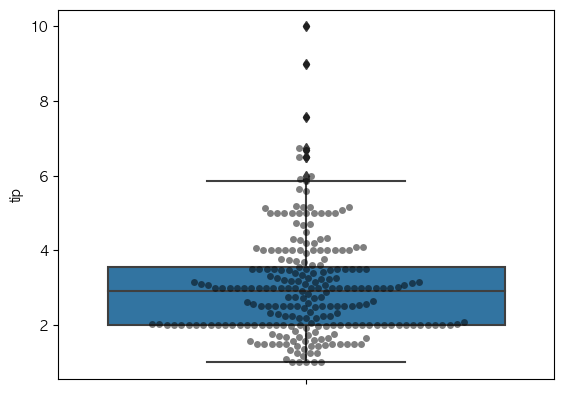

In [15]:
sns.boxplot(data=tips, y='tip')
sns.swarmplot(data=tips, y='tip', color='black', alpha=0.5)
plt.show()

### countplot() 
- 막대그래프(bar plot)을 그리는 함수
- 범주형 변수의 고유값의 개수를 표시
- matplotlib의 bar()

<Axes: xlabel='smoker'>

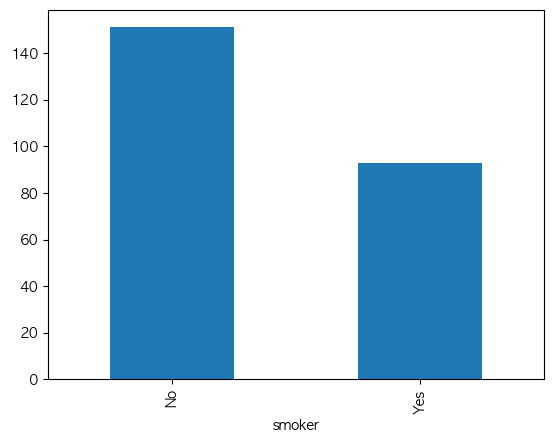

In [17]:
v = tips.smoker.value_counts()  # 직접 수량을 세서 그린다
# plt.bar(v.index, v)
v.plot(kind='bar')

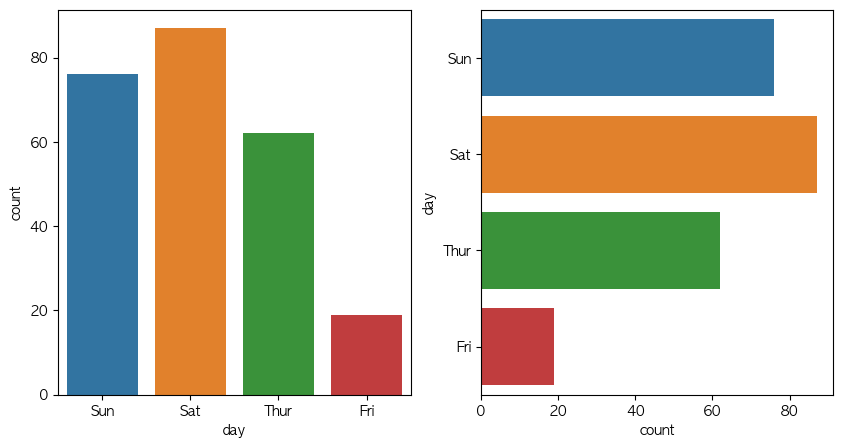

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
# x축에 지정 -> 수직막대그래프
sns.countplot(data=tips, x='day')  # 범주형 컬럼을 지정 -> 범주값(고유값) 별로 개수를 세서 막대그래프를 그린다

plt.subplot(1, 2, 2)
# y축에 지정 -> 수평막대그래프
sns.countplot(data=tips, y='day') 
plt.show()

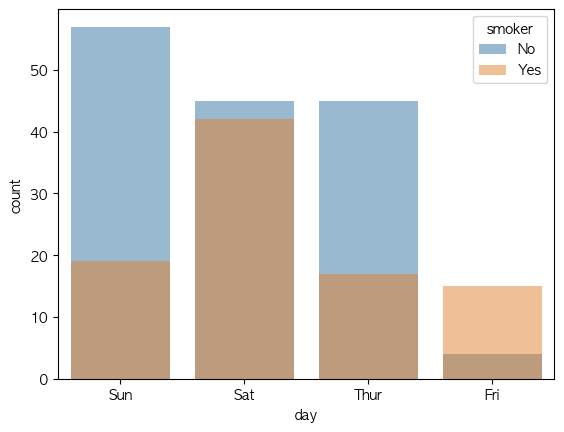

In [26]:
sns.countplot(data=tips, x='day',
              hue='smoker',
              dodge=False,  # True(기본값): 수평누적막대그래프, False: 누적막대그래프(겹쳐서 보여줌)
              alpha=0.5
             )
# hue에 지정한 컬럼의 값 별로 나눠서 그림

plt.show()

## scatterplot, lmplot, jointplot, pairplot
- 산점도를 그린다.

### scatterplot

팔레트 - https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

In [49]:
#### 팔레트 설정 => 프로그램 시작부분에서 설정
sns.set_palette('Set2')

In [50]:
# 현재 팔레트의 색 순서
sns.color_palette()

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [51]:
## colort brewer로 검색

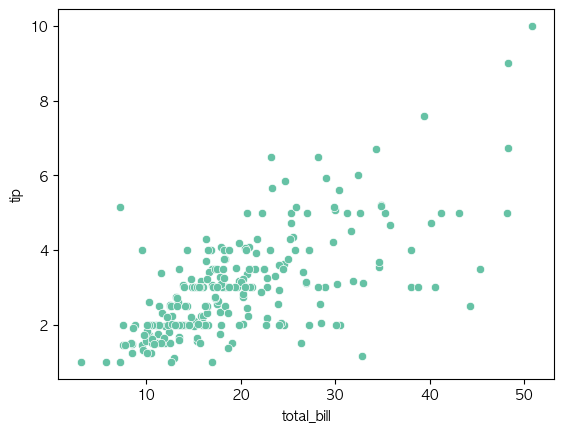

In [52]:
sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.show()

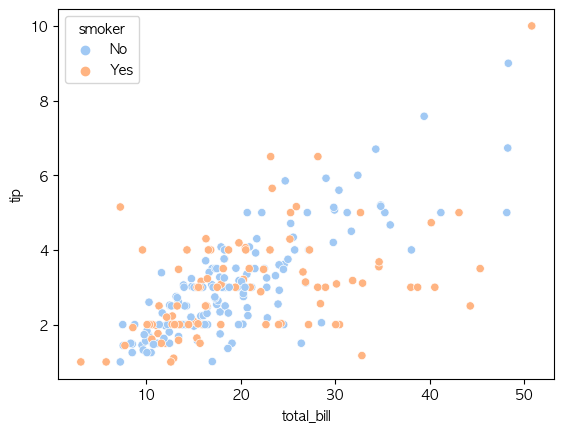

In [54]:
sns.scatterplot(data=tips, x='total_bill', y='tip', 
                hue='smoker',  # smoker 컬럼 기준으로 나눠서 그림
                palette='pastel'
               )
plt.show()

### lmplot()
- 선형회귀 적합선을 포함한 산점도를 그린다.

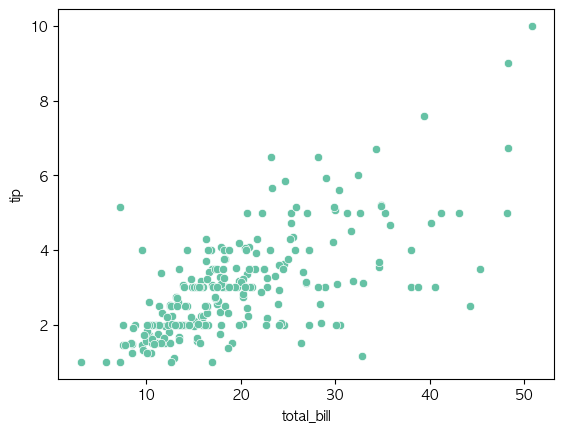

In [55]:
sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.show()

In [56]:
tips[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


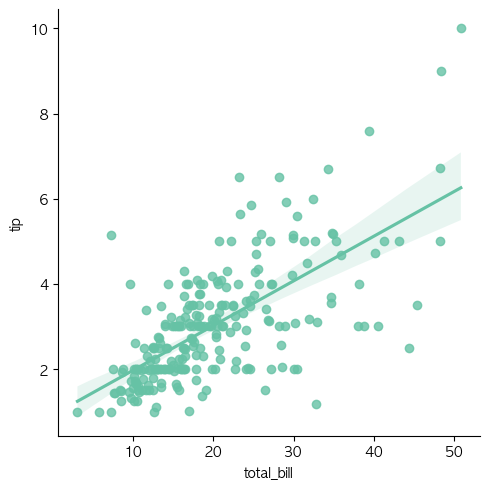

In [57]:
sns.lmplot(data=tips, x='total_bill', y='tip')
plt.show()

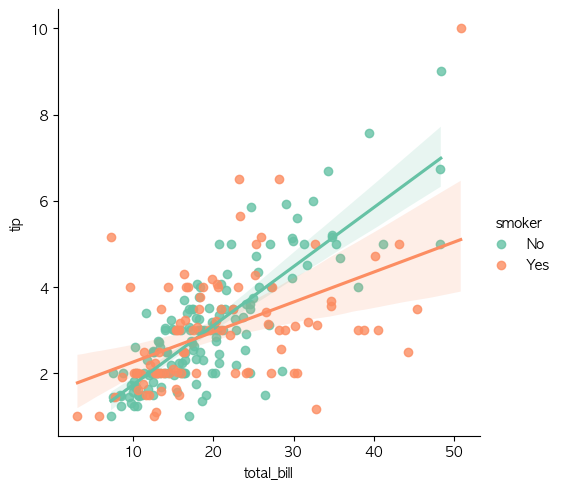

In [58]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker')
plt.show()

### jointplot()
- scatter plot 과 각 변수의 히스토그램을 같이 그린다.
- pandas **DataFrame**만 사용할 수 있다.
- DataFrame

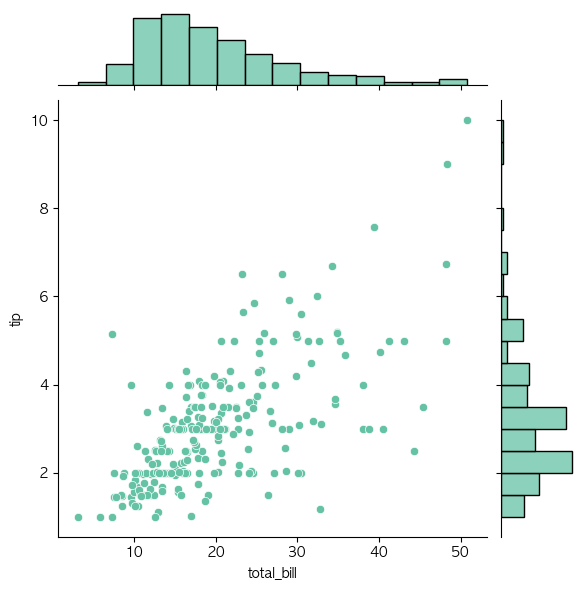

In [59]:
sns.jointplot(data=tips, x='total_bill', y='tip')
plt.show()

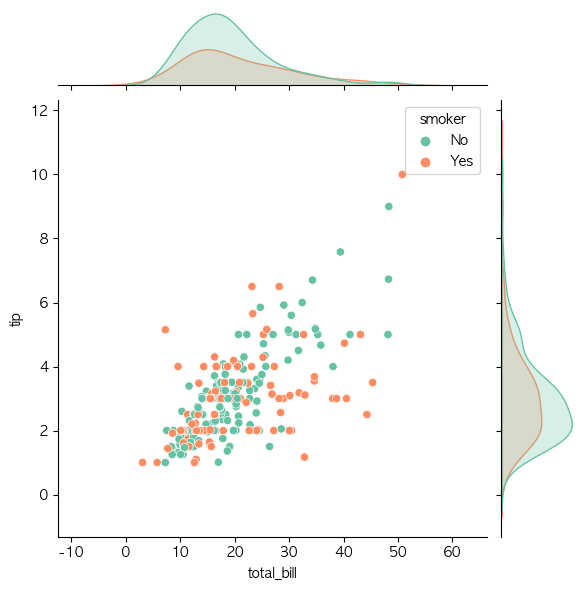

In [60]:
sns.jointplot(data=tips, x='total_bill', y='tip', hue='smoker')  # hue로 나눠서 그릴경우 histogram이 kde plot으로 변경
plt.show()

### pairplot
- 다변수(다차원) 데이터들 간의 산점도를 보여준다. 
- 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 변수간의 산점도를 그린다. 같은 변수가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.

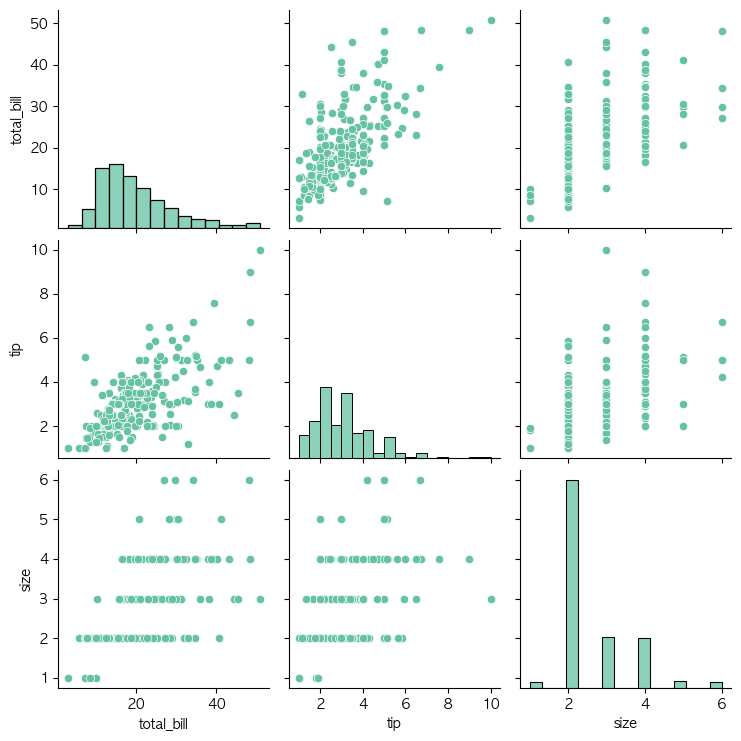

In [61]:
sns.pairplot(tips)  # dataframe을 전달. 각 컬럼(변수)끼리의 산점도를 그림
plt.show()

### heatmap()
- 값들에 비례해서 색깔을 다르게 해 2차원 자료로 시각화

In [64]:
dia = pd.read_csv('data/diamonds.csv')
cor = dia.corr(numeric_only=True)
cor

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


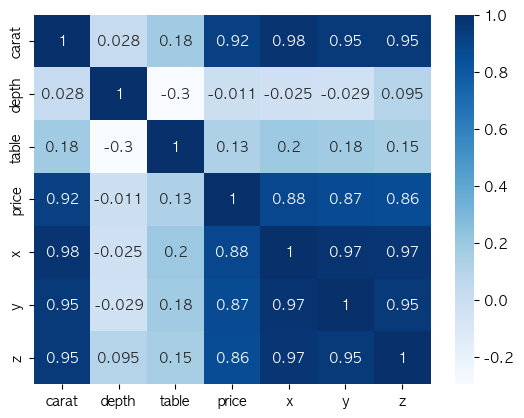

In [68]:
# 2차원 데이터셋 (DataFrame)
sns.heatmap(cor, annot=True, cmap='Blues')  # 2차원 데이터셋 (DataFrame)
plt.show()

### lineplot
- 선그래프
- 시간의 흐름에 따른 값의 변화를 보여주는데 유용하다. (시계열 데이터)

In [69]:
df = pd.read_excel('data/강수량.xlsx')
df.set_index('계절', inplace=True)
df = df.T
df

계절,봄,여름,가을,겨울
2009,231.3,752.0,143.1,142.3
2010,302.9,692.6,307.6,98.7
2011,256.9,1053.6,225.5,45.6
2012,256.5,770.6,363.5,139.3
2013,264.3,567.5,231.2,59.9
2014,215.9,599.8,293.1,76.9
2015,223.2,387.1,247.7,109.1
2016,312.8,446.2,381.6,108.1
2017,118.6,609.7,172.5,75.6


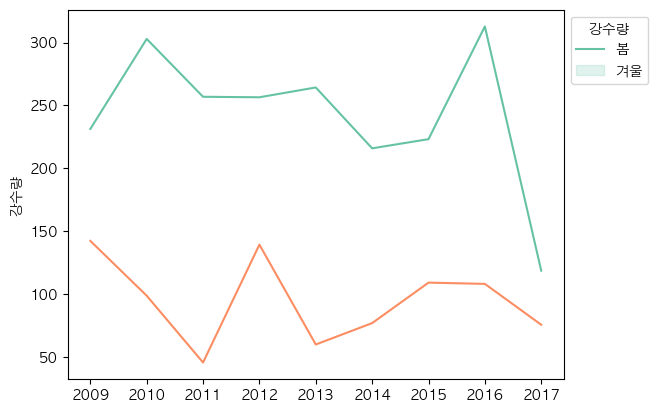

In [78]:
sns.lineplot(data=df, x=df.index, y='봄')
sns.lineplot(data=df, x=df.index, y='겨울')
plt.ylabel('강수량')
# 흠 legend가 왜이렇게 찍히지
plt.legend(['봄', '겨울'], title='강수량', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

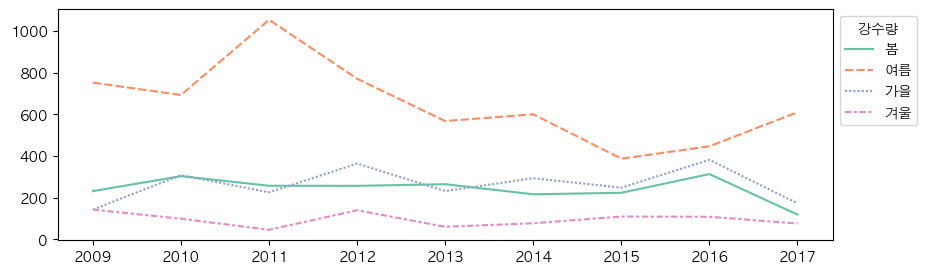

In [82]:
plt.figure(figsize=(10,3))
sns.lineplot(data=df)
# index: x축, y: 컬럼별로 선그래프를 그림
plt.legend(title='강수량', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()